## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#we are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#load data file into a dataframe
df = pd.read_csv('ab_data.csv')
#returns the first n rows of the dataframe
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1






b. Use the below cell to find the number of rows in the dataset.

In [3]:
#returns the number of rows in the dataframe
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#returns the number of unique elements 
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#returns the proportion of users converted
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#returns the number of times the "new_page" and "treatment" don't match
df.query('group == "treatment" and landing_page != "new_page"').count()[0] + df.query('group != "treatment" and landing_page == "new_page"').count()[0]

3893

f. Do any of the rows have missing values?

In [7]:
#looks for NA values in the dataframe
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#creates a new dataset exclusively with the rows where "group" and "landing_page" are correctly aligned
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')

In [9]:
#double check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
#returns the number of rows in the new dataset
df2.shape[0]

290585

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
#returns the number of unique elements 
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
#checks for duplicate values
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [13]:
#finds the repeted "user_id"
df2.loc[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [14]:
#shows information about both rows
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#drops duplicates in the dataset
df2 = df2.drop_duplicates(['user_id'])

In [16]:
#checks changes
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
#returns the probability of an individual converting
df['converted'].mean()

0.11965919355605512

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
#returns the probability of an individual in the control group converting
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
#returns the probability of an individual in the "treatment" group converting
df2.query('group == "treatment"')['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
#returns the probability of an individual receiving the new page
df2.query('landing_page == "new_page"').count()[0] / df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**According to this experiment, the probability of a user reacts positively to a page is very similar in both groups: 11.88% in the treatment group and 12.03% in the control group. Although this difference is leaning in favor of the control page, there is not enough evidence to state which page leads to more conversions. A more in-depth research should be done, with an A/B test and logistic regression tests as well, to understand if this result is statistically significant.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

__Null hypothesis:__
* H0: $p_{new}$ - $p_{old}$ <= 0 

__Alternative hypotheses:__
* H1: $p_{new}$ - $p_{old}$ > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
#returns the convert rate for "p_new"
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
#returns the convert rate for "p_old"
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
#returns the number of users in the "treatment" group
n_new = df2.query('group == "treatment"').count()[0]
n_new

145310

d. What is $n_{old}$?

In [24]:
#returns the number of users in the "control" group
n_old = df2.query('group == "control"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#simulates transactions with a convert rate of "p_new" under the null 
new_page_converted = np.random.choice([0,1], size=n_new, p=[(1- p_new), p_new])
new_page_converted.mean()

0.11998485995457986

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#simulates transactions with a convert rate of "p_old" under the null 
old_page_converted = np.random.choice([0,1], size=n_old, p=[(1- p_old), p_old])
old_page_converted.mean()

0.11906466401420764

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
#calculates the difference between both simulations
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

0.0009201959403722232

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
#creates a sampling distribution of difference in average transactions with both convert rates
p_diffs = []

for c in range (10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[(1- p_new), p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[(1- p_old), p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

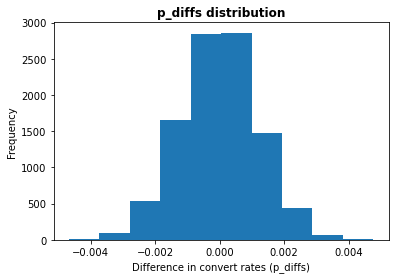

In [29]:
#converts to numpy array
p_diffs = np.array(p_diffs)

#plots sampling distribution
plt.hist(p_diffs)
plt.title('p_diffs distribution', weight='bold')
plt.xlabel('Difference in convert rates (p_diffs)')
plt.ylabel('Frequency');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
#calculates the difference using the original data df2
df2_diff = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
df2_diff

-0.0015782389853555567

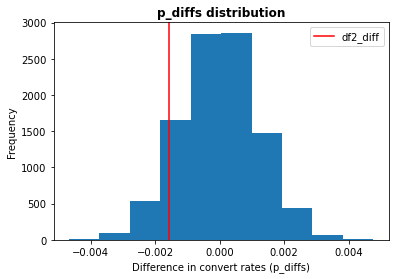

In [31]:
#plots sampling distribution
plt.hist(p_diffs)
plt.title('p_diffs distribution', weight='bold')
plt.xlabel('Difference in convert rates (p_diffs)')
plt.ylabel('Frequency')
# plots line for observed statistic
plt.axvline(df2_diff, c='red', label="df2_diff")
plt.legend(loc='upper right');

In [32]:
#calculates the proportion of "p_diffs" that are greater than the actual difference observed in the original data df2
(p_diffs > df2_diff).mean()

0.9015

In [33]:
1 - (p_diffs > df2_diff).mean()

0.09850000000000003

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The proportion of the p_diffs that are greater than the actual difference observed in the original data (df2) is called p-value. In this case, a p-value is the probability of observing df2_diff (or one statistic more extreme in favor of the alternative) if the null hypothesis is true. The null hypothesis was that the difference would be equal or less than 0, and the alternative was that the difference would be greater than 0. Since the p-value obtained is very large, 0.9067, observing df2_diff from the null is very likely. Therefore, with a type I error rate of 0.05, there is no statistically significant evidence to reject the null hypothesis.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
import statsmodels.api as sm
from scipy.stats import norm

#calculates the number of conversions for both types of pages
convert_old = df2.query('landing_page == "old_page" and converted == 1')['converted'].count()
convert_new = df2.query('landing_page == "new_page" and converted == 1')['converted'].count()

#calculates the number of rows associated with the old page and new page
n_old = df2.query('group == "control"').count()[0]
n_new = df2.query('group == "treatment"').count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
#calculates the z_score and p_value
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

In [36]:
#defines probability 
p = 0.95
#returns the critical value at 95% confidence
norm.ppf(p)

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Using a built-in method in fact led to similar results. In the first approach, the p-value was 0.9076 and, in this case, was 0.9050 – both results are not below an alpha of 0.05. Also, the z-score calculated was -1.3109. The z-score is the number of standard deviations that the observed value is from the center of the distribution. In a normal distribution, 95% of data is within two standard deviations of the mean. Here, it should be around 90%. With a 95% confidence interval, the z-critical value, which is the z-value associated with the significance level chosen, is 1.6448. Therefore, since the z-score is less than the z-critical value, there is no statistically significant evidence to reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**In this case, a logistic regression should be performed since the dependent variable is either "0" or "1".** 

**A logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
#creates a copy of df2 dataset
df3 = df2.copy()
#creates an intercept column
df3["intercept"]=1
df3['ab_page'] = pd.get_dummies(df3['group'])['treatment']
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
#builds a logistic regression model
log_mod = sm.Logit(df3['converted'], df3[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
#provides the summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 26 Apr 2021   Pseudo R-squ.:               8.077e-06
Time:                        16:43:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**In this approach, the p-value associated with ab_page is 0.190. The difference between this p-value and the one found in Part II is related to the type of hypothesis test that is performed. In A/B testing, it is one-tailed test and, in regression model, it is a two-tailed test.**

Hence, here the hypothesis are:

__Null hypothesis:__
* H0: $p_{new}$ - $p_{old}$ = 0 

__Alternative hypotheses:__
* H1: $p_{new}$ - $p_{old}$ ≠ 0



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Multiple linear regression allows multiple independent variables to be part of the regression model. If the outcome of interest is influenced by more than one independent variable, this approach is more appropriate than a simple linear regression. In this case, adding other factors to the model is interesting to test if they influence the conversion rate as well.  One important potential problem of this approach is multicollinearity, which occurs when independent variables correlate with one another, leading to coefficients being flipped from the expected direction. Analyzing the variance inflation factors (or VIFs) for each variable is an important strategy for identifying multicollinearity.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
#loads data file into a dataframe
countries_df = pd.read_csv('./countries.csv')
#checks the first rows of the dataframe
countries_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
#merges country dataset with df3 dataset based on "user_id" column
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
#checks changes
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [42]:
#creates the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
#dropps the baseline column 
df_new.drop('UK', axis = 1, inplace=True)
#checks changes
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0


In [45]:
#builds logistic regression model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'US']])
results = log_mod.fit()
#provides the summary of the model
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 26 Apr 2021   Pseudo R-squ.:               2.323e-05
Time:                        17:41:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.743      0.457      -0.036       0.016
==============================================================================
"""

>**Note:**
>
>**After running the model, it appears that there is no significant p-value (all of them are higher than 0.05). Therefore, it seems that country has no significant effect on conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
#creates new columns representing the interaction between page and country 
df_new['ab_page_CA'] = df_new['ab_page']*df_new['CA']
df_new['ab_page_US'] = df_new['ab_page']*df_new['US']
#checks changes
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,US,ab_page_CA,ab_page_US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,0,0


In [44]:
#builds logistic regression model
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'CA', 'US', 'ab_page_CA', 'ab_page_US']])
results2 = log_mod2.fit()
#provides the summary of the model
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 26 Apr 2021   Pseudo R-squ.:               3.482e-05
Time:                        16:43:55   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9922      0.016   -123.457      0.000      -2.024      -1.961
ab_page        0.0108      0.023      0.475      0.635      -0.034       0.056
CA            -0.0118      0.040     -0.296      0.767      -0.090       0.066
US             0.0057      0.019      0.306      0.760      -0.031       0.043
ab_page_CA    -0.0783      0.057     -1.378      0.168      -0.190       0.033
ab_page_US    -0.0314      0.027     -1.181      0.238      -0.084       0.021
==============================================================================
"""

>**Note:**
>
>**After running the model, it appears that there is no significant p-value (all of them are higher than 0.05). Even considering an interaction between the page received and the country a user lives, there is no significant effect on conversion.**

<a id='conclusions'></a>
## Conclusions

**This analysis aimed to understand the results of an A/B test run by an e-commerce website. Based on these different statistical approaches, there is no evidence to reject the null hypothesis. In other words, this analysis indicates that the company probably should keep the old page or test another version for the new page.**

## References

* https://knowledge.udacity.com/questions/373415
* https://knowledge.udacity.com/questions/289553
* https://knowledge.udacity.com/questions/540647
* https://knowledge.udacity.com/questions/306315
* https://knowledge.udacity.com/questions/484611
* https://knowledge.udacity.com/questions/499075
* https://knowledge.udacity.com/questions/230245
* https://knowledge.udacity.com/questions/487270
* https://knowledge.udacity.com/questions/488694
* https://knowledge.udacity.com/questions/104985
* https://knowledge.udacity.com/questions/32882
* https://knowledge.udacity.com/questions/260462
* https://knowledge.udacity.com/questions/464959
* https://knowledge.udacity.com/questions/257302
* https://knowledge.udacity.com/questions/523333
* https://knowledge.udacity.com/questions/185938
* https://knowledge.udacity.com/questions/489135
* https://knowledge.udacity.com/questions/185938
* https://knowledge.udacity.com/questions/221157
* https://knowledge.udacity.com/questions/316691
* https://knowledge.udacity.com/questions/497362
* https://knowledge.udacity.com/questions/523333
* https://knowledge.udacity.com/questions/66719
* https://knowledge.udacity.com/questions/201987
* https://www.statisticshowto.com/probability-and-statistics/find-critical-values/
* https://pt.khanacademy.org/math/ap-statistics/density-curves-normal-distribution-ap/normal-distributions-calculations/v/z-table-for-proportion-above
* https://onlinelibrary.wiley.com/doi/pdf/10.1197/j.aem.2003.09.006#:~:text=Multiple%20linear%20regression%20allows%20the,individual%20factor%20with%20the%20outcome.
* https://stackoverflow.com/questions/62112930/mibian-returning-nameerror-name-norm-is-not-defined-when-using-with-xlwi
* https://www.statisticssolutions.com/what-is-logistic-regression/